In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import ast
from wordcloud import WordCloud, STOPWORDS
import boto3

In [2]:
import boto3
from botocore.client import Config
import s3fs 
import os
mykey = ""
mysecretkey = ""
config = Config(connect_timeout=120, 
                retries={'max_attempts': 10})
s3 = boto3.resource(
    service_name='s3',
    region_name='us-west-2',
    aws_access_key_id=mykey,
    aws_secret_access_key=mysecretkey
)
client = boto3.client(
    service_name='s3',
    region_name='us-west-2',
    aws_access_key_id=mykey,
    aws_secret_access_key=mysecretkey,
    config=config
)
os.environ["AWS_DEFAULT_REGION"] = 'us-west-2'
os.environ["AWS_ACCESS_KEY_ID"] = mykey
os.environ["AWS_SECRET_ACCESS_KEY"] = mysecretkey

bucket = 'uci-capstone-custfields'


In [3]:
custom_fields = pd.read_csv("cleaned_v5/cleaned_accounts_v5.csv", 
                            usecols = ["tags","keywords","userdefinedfields","org_id","account_id"])

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Count Custom Fields

## Helper Function

In [4]:
def sort_custom_count(custom_fields):
    custom_dict = defaultdict(int)
    for cfs in custom_fields:
        cfs_list = cfs.split(",")
        cfs_set = set()
        for k in cfs_list:
            cfs_set.add(k.strip())
        for k in cfs_set:
            custom_dict[k]+=1

    sorted_custom = [(k,v) for k, v in sorted(custom_dict.items(), key=lambda item: -item[1])]
    return sorted_custom

def sort_udf_count(user_defined_fields):
    custom_dict = defaultdict(int)
    for cfs in user_defined_fields:
        cfs_list = ast.literal_eval(cfs)
        for k in cfs_list.keys():
            custom_dict[k]+=1

    sorted_custom = [(k,v) for k, v in sorted(custom_dict.items(), key=lambda item: -item[1])]
    return sorted_custom

In [5]:
def display_wordcloud(cust_field_tuple, title):
    cust_field_dict = dict()
    for k,v in cust_field_tuple:
        cust_field_dict[k] = v
    wc = WordCloud(collocations=False,background_color = "white",width=800, height=400).generate_from_frequencies(cust_field_dict)
    plt.figure(figsize = (20, 20), facecolor = None)
    plt.imshow(wc)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.savefig(f'WordCloud/WordCloud_{title}.png')
    plt.show()

## Keywords

In [6]:
keywords = custom_fields.keywords.apply(lambda x: x[1:-1] if type(x)==str else x)
keywords = keywords.dropna().tolist()
sorted_keywords = sort_custom_count(keywords)

In [20]:
sorted_keywords[0:5]

[("'P'", 407021),
 ("'P9999999999'", 83256),
 ("'P0000000000'", 76181),
 ("'IBM$'", 45040),
 ("'na'", 26367)]

In [7]:
len(sorted_keywords)

21015018

In [37]:
keywords_df=pd.DataFrame.from_records(sorted_keywords, columns = ["keyword","keyword_count"])
keywords_df.to_csv("WordCloud/keywords_count.csv")
keywords_df

,keyword,keyword_count
0,'P',407021
1,'P9999999999',83256
2,'P0000000000',76181
3,'IBM$',45040
4,'na',26367
...,...,...
21015013,'Ptwhigginbotham@live.com',1
21015014,'P9033487872',1
21015015,'Pcapecodbrothers@gmail.com',1
21015016,'P5082412209',1


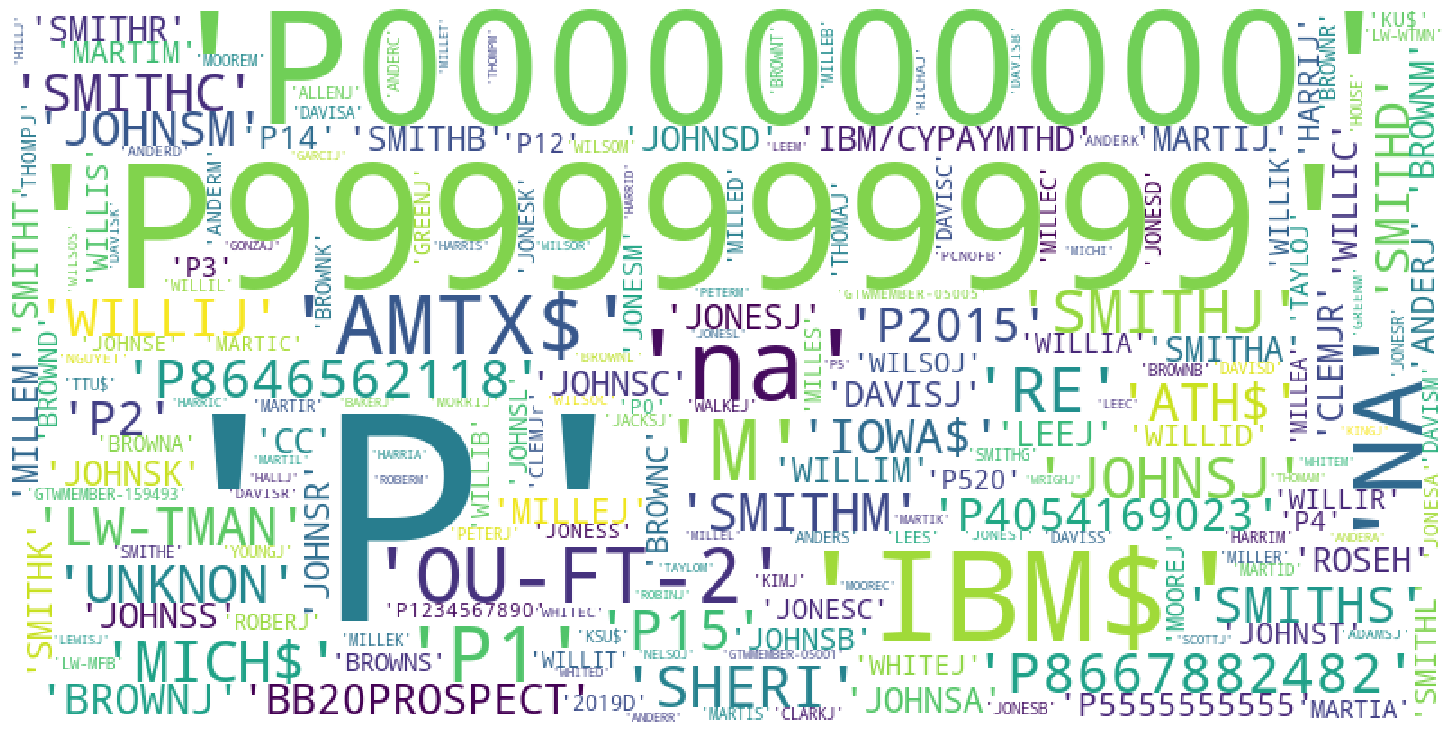

In [12]:
display_wordcloud(sorted_keywords, title = "WordCloud_Keywords")

## Tags

In [8]:
tags = custom_fields.tags.apply(lambda x: x[1:-1] if type(x)==str else x)
tags = tags.dropna().tolist()
sorted_tags = sort_custom_count(tags)

In [22]:
sorted_tags[0:5]

[("'ADVSEED'", 378751),
 ("'INACTIVESTUD'", 293740),
 ("'ET'", 285051),
 ("'PPC.ADVCK'", 276644),
 ("'WHCONV'", 255636)]

In [84]:
len(sorted_tags)

134480

In [39]:
tags_df=pd.DataFrame.from_records(sorted_tags, columns = ["tag","tag_count"])
tags_df.to_csv("WordCloud/tags_count.csv")
tags_df

,tag,tag_count
0,'ADVSEED',378751
1,'INACTIVESTUD',293740
2,'ET',285051
3,'PPC.ADVCK',276644
4,'WHCONV',255636
...,...,...
134479,'39783',1
134480,'MTF',1
134481,'MTF2015',1
134482,'MTF2014',1


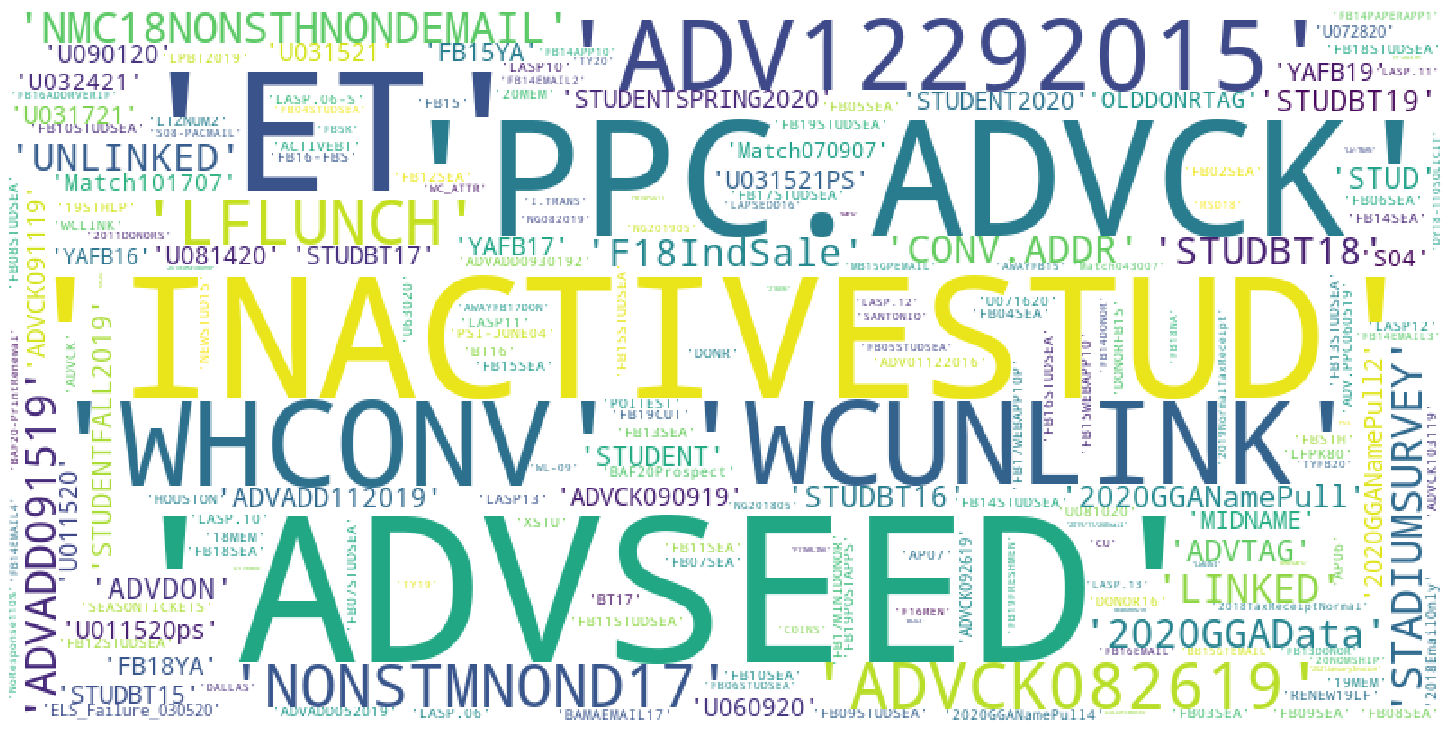

In [15]:
display_wordcloud(sorted_tags, title = "WordCloud_Tags")

In [12]:
tags_df = custom_fields[["org_id","tags"]].dropna()

In [16]:
tags_df[tags_df.tags.str.contains("'WCUNLINK'")]["org_id"].unique()

array(['MICH'], dtype=object)

## User Defined Fields

In [25]:
userdefinedfields = custom_fields.userdefinedfields.dropna()
# userdefinedfields = userdefinedfields.dropna().tolist()
sorted_userdefinedfields = sort_udf_count(userdefinedfields)


In [83]:
len(sorted_userdefinedfields)


134

In [40]:
userdefinedfields_df=pd.DataFrame.from_records(sorted_userdefinedfields, columns = ["userdefinedfields","userdefinedfields_count"])
userdefinedfields_df.to_csv("WordCloud/userdefinedfields_count.csv")
userdefinedfields_df

,userdefinedfields,userdefinedfields_count
0,WCO,252969
1,STID,208840
2,SHIPMILES,208497
3,SG,110187
4,AR,110187
...,...,...
129,APSCCURRENT,8
130,PAP,5
131,APVBPREV,5
132,FBRank,1


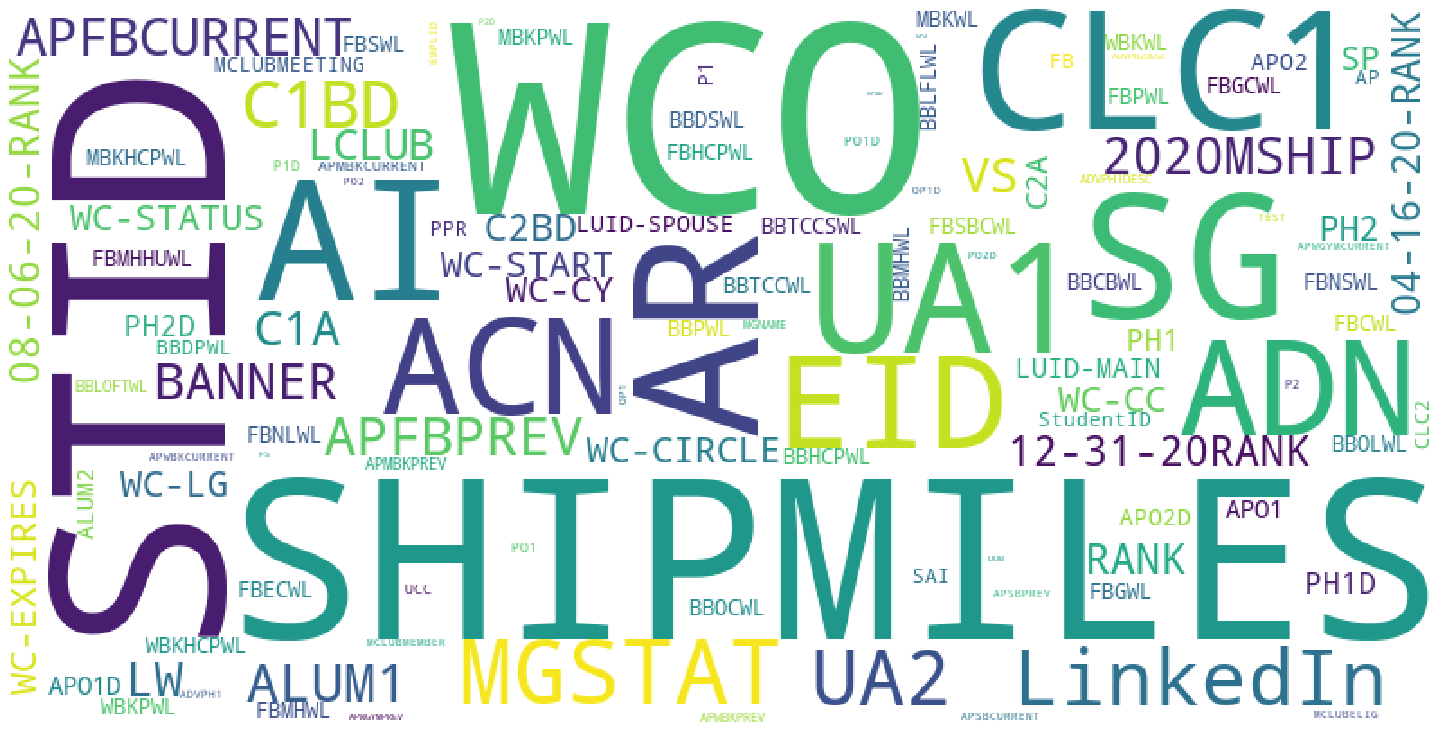

In [18]:
display_wordcloud(sorted_userdefinedfields, title = "WordCloud_UserDefinedFields")